In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import glob
import pandas as pd
from IPython.display import display
from collections import Counter

In [11]:
dirc = os.getcwd()
dataframes = {}
filenames = glob.glob(dirc+'/Day1_bananas/*.log')

for file in filenames:
    start = False
    text = []
    f = open(file,"r")
    for line in f:
        if 'Activities log:' in line:
            start = True
        elif start:
            text.append(line)

with open(file.replace('.log', '.csv'), "w") as file:
    file.write(''.join(text))

In [12]:
def parse_dat(file):
    """
    parses the results csv, named as results_[day].csv
    """
    name = re.search(r'\\(log.*)\.csv$', file).group(1)
    df = pd.read_csv(file, index_col=False, sep=";")
    return name,  df

In [13]:
filenames = glob.glob(dirc+'/Day1_bananas/*.csv')
for file in filenames:
    print(file)
    print(parse_dat(file))

C:\Users\tommy\OneDrive - University of Cambridge\Trading\Competitions\IMC_Prosperity\Log_files/Day1_bananas\log_bananas_MM_v1.csv
('log_bananas_MM_v1',       day  timestamp  product  bid_price_1  bid_volume_1  bid_price_2  \
0       0          0   PEARLS         9998             9       9995.0   
1       0          0  BANANAS         4893             9       4892.0   
2       0        100   PEARLS        10002             1      10000.0   
3       0        100  BANANAS         4897             1       4892.0   
4       0        200   PEARLS         9996             1       9995.0   
...   ...        ...      ...          ...           ...          ...   
1995    0      99700   PEARLS         9995            26          NaN   
1996    0      99800   PEARLS         9996             1       9995.0   
1997    0      99800  BANANAS         4890            26          NaN   
1998    0      99900  BANANAS         4891             5       4890.0   
1999    0      99900   PEARLS         9998  

In [23]:
output_dfs = {}
filenames = glob.glob(dirc+'/Day1_bananas/*.csv')
for afile in filenames:
    name, output = parse_dat(afile)
    #create unique list of names
    products = output['product'].unique()
    #create a data frame dictionary to store your data frames
    dfs = {elem : pd.DataFrame() for elem in products}
    for key in dfs.keys():
        dfs[key] = output[:][output["product"] == key]
    output_dfs[name]=dfs

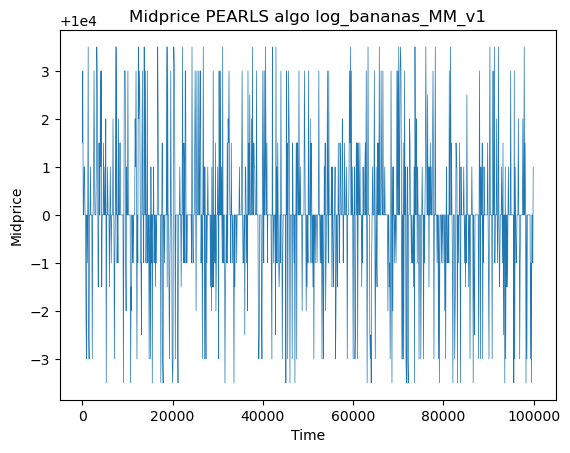

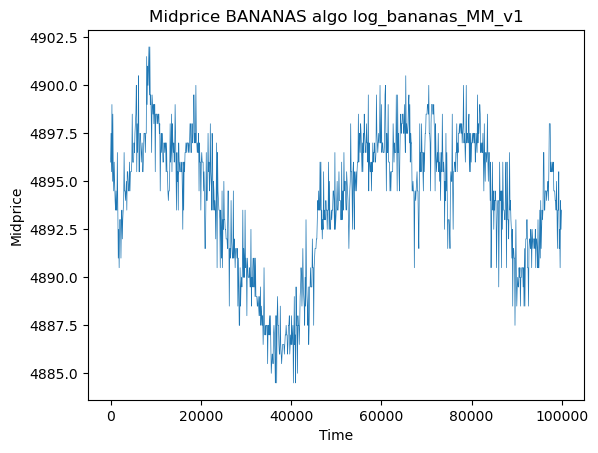

In [25]:
for name, assets in output_dfs.items():
    for asset, data in assets.items():
        plt.plot(data['timestamp'], data['mid_price'], label = asset, linewidth = 0.5)
        plt.xlabel('Time')
        plt.ylabel('Midprice')
        plt.title('Midprice ' + asset + " algo " + name)
        plt.show()

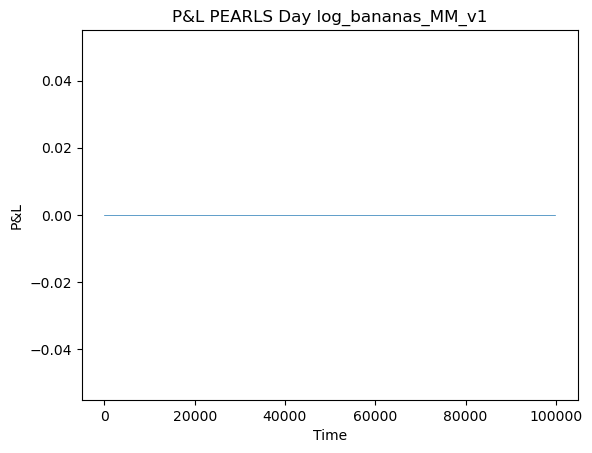

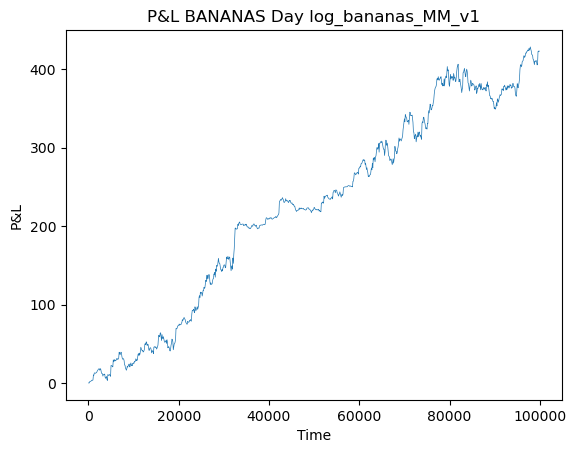

In [26]:
for day, assets in output_dfs.items():
    for asset, data in assets.items():
        plt.plot(data['timestamp'], data['profit_and_loss'], label = asset, linewidth = 0.5)
        plt.xlabel('Time')
        plt.ylabel('P&L')
        plt.title('P&L ' + asset + " Day " + day)
        plt.show()